## Feed Forward Neural Network:

In [30]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [32]:
torch.manual_seed(42)

In [34]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [109]:
# params
input_size = 784  # 28X28
hidden_size = 42
num_classes = 10
epochs = 2
batch_sizee = 64
learning_rate = 0.001

In [111]:
# Loading MNIST Dataset

train_dataset = torchvision.datasets.MNIST(root='/', train= True, transform= transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='/', train= False, transform= transforms.ToTensor())

In [112]:
# DataLoader

train_loader = DataLoader(train_dataset, batch_size=batch_sizee, shuffle=True, pin_memory=True)

test_loader = DataLoader(test_dataset, batch_size=batch_sizee, pin_memory=True)

In [113]:
# Iterator to iterate Loader

example = iter(train_loader)
sample, labels = next(example)
print(sample.shape, labels.shape)   # [batch_size, No_channel, row(width), col(hight)]

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [114]:
# Graph

import matplotlib.pyplot as plt

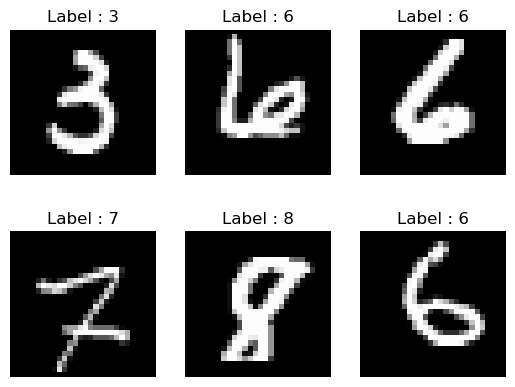

In [115]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample[i][0], cmap='gray')
    plt.title(label= f'Label : {labels[i].item()}')
    plt.axis('off')
plt.show()

---
# NN model:

In [121]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes),
            #nn.Softmax()
        )

    def forward(self, x):
        return self.model(x)

In [124]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [126]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()

optimzer = torch.optim.Adam(model.parameters(), lr= learning_rate)

---
## Training Loop:

In [135]:

no_train_loader = len(train_loader)


for epoch in range(epochs):

    for feature, label in train_loader:
        # 64, 1, 28, 28   ---> size of images 
        # 64, 784         ---> need to convert it into this  shape to show images

        feature = feature.reshape(-1, 28*28).to(device)
        label = label.to(device)

        # forward pass
        y_pred = model(feature)

        # loss
        loss = criterion(y_pred, label)

        # backward
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()

        print(f'epoch: {epoch+1}, Loss: {loss.item()}')


epoch: 1, Loss: 0.06608237326145172
epoch: 1, Loss: 0.17335040867328644
epoch: 1, Loss: 0.2080589234828949
epoch: 1, Loss: 0.10661117732524872
epoch: 1, Loss: 0.15082181990146637
epoch: 1, Loss: 0.1437205821275711
epoch: 1, Loss: 0.34994399547576904
epoch: 1, Loss: 0.32166606187820435
epoch: 1, Loss: 0.2416011393070221
epoch: 1, Loss: 0.14803174138069153
epoch: 1, Loss: 0.23226211965084076
epoch: 1, Loss: 0.1370471864938736
epoch: 1, Loss: 0.29769209027290344
epoch: 1, Loss: 0.07635704427957535
epoch: 1, Loss: 0.07645626366138458
epoch: 1, Loss: 0.18185728788375854
epoch: 1, Loss: 0.16794034838676453
epoch: 1, Loss: 0.22071409225463867
epoch: 1, Loss: 0.1384400576353073
epoch: 1, Loss: 0.2197483330965042
epoch: 1, Loss: 0.1591428816318512
epoch: 1, Loss: 0.18229088187217712
epoch: 1, Loss: 0.1630948930978775
epoch: 1, Loss: 0.18128788471221924
epoch: 1, Loss: 0.15606451034545898
epoch: 1, Loss: 0.16733530163764954
epoch: 1, Loss: 0.09876787662506104
epoch: 1, Loss: 0.19672724604606628


---
## Testing:

In [138]:
model.eval()

NeuralNet(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=42, bias=True)
    (1): ReLU()
    (2): Linear(in_features=42, out_features=10, bias=True)
  )
)

### Accurasy on Testing Data:

In [144]:
with torch.no_grad():
    total = 0
    correct = 0

    for feature, label in test_loader:
        # 64, 1, 28, 28   ---> size of images 
        # 64, 784         ---> need to convert it into this  shape to show images

        feature = feature.reshape(-1, 28*28).to(device)
        label = label.to(device)

        # forward pass
        y_pred = model(feature)

      # values, index
        _, predected = torch.max(y_pred, 1)

        total += label.shape[0]

        correct += (predected == label).sum().item()


# Accuracy:
acc = (correct/total)*100

print("Accuracy : ", acc)

        

Accuracy :  95.95


#### Accuracy on Training Data

In [148]:
with torch.no_grad():
    total = 0
    correct = 0

    for feature, label in train_loader:
        # 64, 1, 28, 28   ---> size of images 
        # 64, 784         ---> need to convert it into this  shape to show images

        feature = feature.reshape(-1, 28*28).to(device)
        label = label.to(device)

        # forward pass
        y_pred = model(feature)

      # values, index
        _, predected = torch.max(y_pred, 1)

        total += label.shape[0]

        correct += (predected == label).sum().item()


# Accuracy:
acc = (correct/total)*100

print("Accuracy : ", acc)

        

Accuracy :  96.255
